In [ ]:

import nltk
import re
import string
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer
from nltk import FreqDist

# Download required resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the punkt_tab resource

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
text = """One of my favorite foods is pizza because it's both comforting and incredibly versatile. Whether it’s a classic Margherita with fresh basil and mozzarella or a bold barbecue chicken with a crispy crust, there’s a flavor for every mood. The smell of melted cheese and baked dough is enough to make anyone’s mouth water. What I love most is how customizable it is—you can pile on your favorite toppings or keep it simple and still enjoy every bite. It’s the perfect meal for sharing with friends or enjoying solo on a cozy night in. No matter the occasion, pizza never disappoints."""

text = re.sub(r'[^\w\s]', '', text.lower())

words = word_tokenize(text)
sentences = sent_tokenize(text)

split_words = text.split()
print("Split words:", split_words[:20])
print("Word_tokenize:", words[:20])
print("Difference:", set(split_words) - set(words))

stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.lower() not in stop_words]


word_freq = FreqDist(filtered_words)
print("\nWord Frequency Distribution (excluding stopwords):")
word_freq.most_common()

Split words: ['one', 'of', 'my', 'favorite', 'foods', 'is', 'pizza', 'because', 'its', 'both', 'comforting', 'and', 'incredibly', 'versatile', 'whether', 'its', 'a', 'classic', 'margherita', 'with']
Word_tokenize: ['one', 'of', 'my', 'favorite', 'foods', 'is', 'pizza', 'because', 'its', 'both', 'comforting', 'and', 'incredibly', 'versatile', 'whether', 'its', 'a', 'classic', 'margherita', 'with']
Difference: set()

Word Frequency Distribution (excluding stopwords):


[('favorite', 2),
 ('pizza', 2),
 ('every', 2),
 ('one', 1),
 ('foods', 1),
 ('comforting', 1),
 ('incredibly', 1),
 ('versatile', 1),
 ('whether', 1),
 ('classic', 1),
 ('margherita', 1),
 ('fresh', 1),
 ('basil', 1),
 ('mozzarella', 1),
 ('bold', 1),
 ('barbecue', 1),
 ('chicken', 1),
 ('crispy', 1),
 ('crust', 1),
 ('theres', 1),
 ('flavor', 1),
 ('mood', 1),
 ('smell', 1),
 ('melted', 1),
 ('cheese', 1),
 ('baked', 1),
 ('dough', 1),
 ('enough', 1),
 ('make', 1),
 ('anyones', 1),
 ('mouth', 1),
 ('water', 1),
 ('love', 1),
 ('customizable', 1),
 ('isyou', 1),
 ('pile', 1),
 ('toppings', 1),
 ('keep', 1),
 ('simple', 1),
 ('still', 1),
 ('enjoy', 1),
 ('bite', 1),
 ('perfect', 1),
 ('meal', 1),
 ('sharing', 1),
 ('friends', 1),
 ('enjoying', 1),
 ('solo', 1),
 ('cozy', 1),
 ('night', 1),
 ('matter', 1),
 ('occasion', 1),
 ('never', 1),
 ('disappoints', 1)]

In [ ]:

import pandas as pd

words = re.findall(r'\b[a-zA-Z]+\b', text)
print(words)

filtered_words = [word for word in words if word not in stop_words]
print(filtered_words)
ps = PorterStemmer()
lm = WordNetLemmatizer()
data = []
for word in filtered_words:
  porter_stem = ps.stem(word)
  lemma = lm.lemmatize(word)
  data.append([word, porter_stem, lemma])

df = pd.DataFrame(data, columns=["Word", "PorterStemmed Word", "Lemmatizer Word"])
display(df)

['one', 'of', 'my', 'favorite', 'foods', 'is', 'pizza', 'because', 'its', 'both', 'comforting', 'and', 'incredibly', 'versatile', 'whether', 'its', 'a', 'classic', 'margherita', 'with', 'fresh', 'basil', 'and', 'mozzarella', 'or', 'a', 'bold', 'barbecue', 'chicken', 'with', 'a', 'crispy', 'crust', 'theres', 'a', 'flavor', 'for', 'every', 'mood', 'the', 'smell', 'of', 'melted', 'cheese', 'and', 'baked', 'dough', 'is', 'enough', 'to', 'make', 'anyones', 'mouth', 'water', 'what', 'i', 'love', 'most', 'is', 'how', 'customizable', 'it', 'isyou', 'can', 'pile', 'on', 'your', 'favorite', 'toppings', 'or', 'keep', 'it', 'simple', 'and', 'still', 'enjoy', 'every', 'bite', 'its', 'the', 'perfect', 'meal', 'for', 'sharing', 'with', 'friends', 'or', 'enjoying', 'solo', 'on', 'a', 'cozy', 'night', 'in', 'no', 'matter', 'the', 'occasion', 'pizza', 'never', 'disappoints']
['one', 'favorite', 'foods', 'pizza', 'comforting', 'incredibly', 'versatile', 'whether', 'classic', 'margherita', 'fresh', 'basil

,Word,PorterStemmed Word,Lemmatizer Word
0,one,one,one
1,favorite,favorit,favorite
2,foods,food,food
3,pizza,pizza,pizza
4,comforting,comfort,comforting
5,incredibly,incred,incredibly
6,versatile,versatil,versatile
7,whether,whether,whether
8,classic,classic,classic
9,margherita,margherita,margherita


In [ ]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
texts=["Scientists Discover New Species of Orchid in the Amazon Rainforest.","This wireless speaker has amazing sound quality and a long battery life. Totally worth the price!","Tried the new iced caramel latte today—absolutely delicious! Highly recommend if you're a coffee lover."]
cv = CountVectorizer()
X = cv.fit_transform(texts)
print(cv.get_feature_names_out())

print(X.toarray())

#2

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(texts)
feature_names = tfidf.get_feature_names_out()
print(feature_names)
print(tfidf_matrix.toarray())

#3
for i, text in enumerate(texts):
    tfidf_scores = tfidf_matrix[i].toarray()[0]
    sorted_indices = tfidf_scores.argsort()[::-1]
    top_keywords = [feature_names[j] for j in sorted_indices[:3]]
    print(f"Text {i + 1}: {text}")
    print(f"Top 3 keywords: {top_keywords}\n")


['absolutely' 'amazing' 'amazon' 'and' 'battery' 'caramel' 'coffee'
 'delicious' 'discover' 'has' 'highly' 'iced' 'if' 'in' 'latte' 'life'
 'long' 'lover' 'new' 'of' 'orchid' 'price' 'quality' 'rainforest' 're'
 'recommend' 'scientists' 'sound' 'speaker' 'species' 'the' 'this' 'today'
 'totally' 'tried' 'wireless' 'worth' 'you']
[[0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0
  0 0]
 [0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1
  1 0]
 [1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0
  0 1]]
['absolutely' 'amazing' 'amazon' 'and' 'battery' 'caramel' 'coffee'
 'delicious' 'discover' 'has' 'highly' 'iced' 'if' 'in' 'latte' 'life'
 'long' 'lover' 'new' 'of' 'orchid' 'price' 'quality' 'rainforest' 're'
 'recommend' 'scientists' 'sound' 'speaker' 'species' 'the' 'this' 'today'
 'totally' 'tried' 'wireless' 'worth' 'you']
[[0.         0.         0.33468921 0.         0.         0.
  0.         0.         0.33468921

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
A = """
AI is a technology that enables machines to mimic human intelligence. It powers voice assistants, recommendation systems, and even self-driving cars. AI can analyze data, recognize patterns, and make decisions faster than humans. It's used in fields like healthcare, finance, and education to improve efficiency and accuracy.
"""
B = """
Blockchain is a secure, decentralized system for recording transactions. It’s the technology behind cryptocurrencies like Bitcoin. Each block in the chain holds data and is linked to the previous one, making it nearly impossible to alter. Blockchain is praised for its transparency, security, and potential in areas like finance, supply chains, and digital identity.
"""

texts1 = re.sub(r'[^\w\s]', '', A.lower())
print(texts1)

texts2 = re.sub(r'[^\w\s]', '', B.lower())
print(texts2)

text1 = set(texts1.split())
print(text1)

text2 = set(texts2.split())
print(text2)


jaccard = len(text1.intersection(text2)) / len(text1.union(text2))
print("Jaccard Similarity:", jaccard)

tfidf_vec = TfidfVectorizer()
vecs = tfidf_vec.fit_transform([texts1, texts2])
cos_sim = cosine_similarity(vecs[0:1], vecs[1:2])
print("Cosine Similarity:", cos_sim[0][0])


ai is a technology that enables machines to mimic human intelligence it powers voice assistants recommendation systems and even selfdriving cars ai can analyze data recognize patterns and make decisions faster than humans its used in fields like healthcare finance and education to improve efficiency and accuracy


blockchain is a secure decentralized system for recording transactions its the technology behind cryptocurrencies like bitcoin each block in the chain holds data and is linked to the previous one making it nearly impossible to alter blockchain is praised for its transparency security and potential in areas like finance supply chains and digital identity

{'faster', 'to', 'powers', 'its', 'recommendation', 'systems', 'that', 'selfdriving', 'healthcare', 'can', 'than', 'machines', 'fields', 'analyze', 'make', 'data', 'it', 'and', 'even', 'a', 'voice', 'is', 'patterns', 'improve', 'recognize', 'like', 'intelligence', 'in', 'humans', 'education', 'assistants', 'enables', 'cars',

Review: This phone is absolutely amazing! The battery lasts all day and the camera quality is stunning.
Polarity: 0.625
Subjectivity: 0.95
Sentiment: Positive
Review: I'm really disappointed with this laptop. It runs slow and crashes frequently.
Polarity: -0.3166666666666667
Subjectivity: 0.48333333333333334
Sentiment: Negative
Review: The headphones are decent for the price, but the sound quality could be better.
Polarity: 0.35555555555555557
Subjectivity: 0.5222222222222223
Sentiment: Positive
Review: I love this coffee maker! It’s easy to use, fast, and makes great-tasting coffee every time.
Polarity: 0.41944444444444445
Subjectivity: 0.6777777777777777
Sentiment: Positive
Review: Terrible experience with the customer service. They were rude and unhelpful.
Polarity: -0.65
Subjectivity: 0.8
Sentiment: Negative


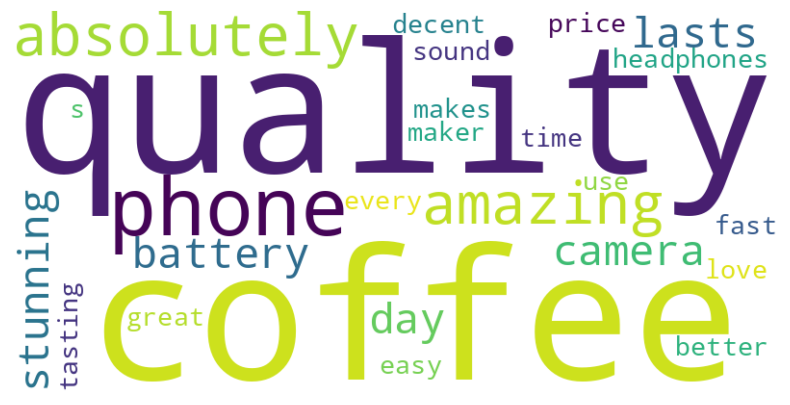

In [22]:

from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

reviews = [
    "This phone is absolutely amazing! The battery lasts all day and the camera quality is stunning.",
    "I'm really disappointed with this laptop. It runs slow and crashes frequently.",
    "The headphones are decent for the price, but the sound quality could be better.",
    "I love this coffee maker! It’s easy to use, fast, and makes great-tasting coffee every time.",
    "Terrible experience with the customer service. They were rude and unhelpful."
]
positive_reviews = []
for(i,review) in enumerate(reviews):
  blob = TextBlob(review)
  polarity = blob.sentiment.polarity
  subjectivity = blob.sentiment.subjectivity
  print(f"Review: {review}")
  print(f"Polarity: {polarity}")
  print(f"Subjectivity: {subjectivity}")
  if polarity > 0.1:
      sentiment = "Positive"
      positive_reviews.append(review)
  elif polarity < -0.1:
      sentiment = "Negative"
  else:
      sentiment = "Neutral"
  print(f"Sentiment: {sentiment}")

#3
all_positive_text = " ".join(positive_reviews)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()